In [7]:
import requests
import json
from tqdm.auto import tqdm
from collections import defaultdict
import pickle 
import pandas as pd

In [15]:
import time

In [32]:
# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
# Вытащите все описания этих вакансий
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
# Переведите даты публикаций в datetime
# Постройте график опубликованных вакансий по датам
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий

# Найдите те вакансии с использованием python, которые вам интересны

# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и

# Постройте график наиболее востребованных вакансий

In [33]:
# выгрузила вакансии

sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}'

In [34]:
# получила кол-во страниц

res = requests.get(url)

# res.json()

vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

20

In [35]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [36]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [38]:
alli_vacancy_ids= []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

In [39]:
# по id получила информацию и переведа в датафрейм

tabdict = defaultdict(list)
for vac_id in tqdm(all_vacancy_ids):
    try:
        url = f'https://api.hh.ru/vacancies/{vac_id}'
        res = requests.get(url, timeout=10)
        vacancy = res.json()
        tabdict['id'].append(vacancy.get('id'))
        tabdict['name'].append(vacancy.get('name'))
        tabdict['description'].append(vacancy.get('description'))
        tabdict['skills'].append([vacancy.get('key_skills')])
        tabdict['published_at'].append(vacancy.get('published_at'))
    except:
        print('exception')
        pass

exception



In [40]:
# итоговый список, загружено 4483 вакансии

df = pd.DataFrame(tabdict)
df

,id,name,description,skills,published_at
0,44279989,Клиентский менеджер прямых продаж,"<p>Хочешь работать в банке, но офисная рутина ...","[[{'name': 'Прямые продажи'}, {'name': 'Активн...",2021-06-25T13:03:24+0300
1,44281010,Клиентский менеджер,"<p>Клиентский менеджер ― специалист, который п...","[[{'name': 'Активные продажи'}, {'name': 'Конс...",2021-07-08T10:59:01+0300
2,44955098,Клиентский менеджер прямых продаж,<p>У каждого нашего зарплатного клиента – комп...,"[[{'name': 'Проведение презентаций'}, {'name':...",2021-07-07T11:58:52+0300
3,46018300,Специалист в Архив,<p><strong>от 53 200 руб. до вычета налогов</s...,[[]],2021-07-06T15:15:33+0300
4,46148921,IT лидер,<p><em><strong>Продукт «Бизнес-контент маркети...,"[[{'name': 'Управление проектами'}, {'name': '...",2021-07-12T10:05:38+0300
...,...,...,...,...,...
4478,46045740,Верстальщик e-mail рассылок,<p><b>Обязанности:</b></p><ul><li>Верстать HTM...,[[]],2021-07-07T11:45:44+0300
4479,41780201,Клиентский менеджер (Прямые продажи),"<p>Хочешь работать в банке, но офисная рутина ...",[[]],2021-07-08T17:52:20+0300
4480,44947280,Консультант,<p>Консультант в отделении Сбербанка встречает...,"[[{'name': 'Грамотная речь'}, {'name': 'Ориент...",2021-06-26T15:06:01+0300
4481,45882350,Менеджер (Центр организации обработки и защиты...,<p><strong>Обязанности:</strong></p> <p> </p> ...,[[]],2021-07-01T10:15:30+0300


In [62]:
# какие вакансии наиболее востребованы

df['name'].value_counts()

Клиентский менеджер                                       222
Старший клиентский менеджер                               115
Консультант                                                96
Старший менеджер по обслуживанию                           85
Клиентский менеджер (Прямые продажи)                       84
                                                         ... 
Старший менеджер по обслуживанию (п. Павловский)            1
Системный аналитик (Платформа рекомендательных систем)      1
Стажер SberSeasons Analytics                                1
Администратор Basis                                         1
Специалист управления безопасности                          1
Name: name, Length: 1529, dtype: int64

In [63]:
t2 = df.name.str.contains('Клиентский менеджер')
km_df = df[t2]
km_df

,published_at,id,name,description,skills,weekday
0,2021-06-25,44279989,Клиентский менеджер прямых продаж,"<p>Хочешь работать в банке, но офисная рутина ...","[[{'name': 'Прямые продажи'}, {'name': 'Активн...",4
1,2021-07-08,44281010,Клиентский менеджер,"<p>Клиентский менеджер ― специалист, который п...","[[{'name': 'Активные продажи'}, {'name': 'Конс...",3
2,2021-07-07,44955098,Клиентский менеджер прямых продаж,<p>У каждого нашего зарплатного клиента – комп...,"[[{'name': 'Проведение презентаций'}, {'name':...",2
11,2021-07-07,44951547,Клиентский менеджер,"<p>Клиентский менеджер ― специалист, который п...","[[{'name': 'Активные продажи'}, {'name': 'Прям...",2
52,2021-07-05,45964253,Клиентский менеджер 'Сбербанк Первый',<p><strong>от 137 000 руб. до вычета налогов</...,[[]],0
...,...,...,...,...,...,...
4466,2021-06-28,45784414,Клиентский менеджер,"<p>Клиентский менеджер ― специалист, который п...",[[]],0
4472,2021-06-27,44985446,Клиентский менеджер,"<p>Клиентский менеджер ― специалист, который п...","[[{'name': 'Активные продажи'}, {'name': 'Холо...",6
4475,2021-07-10,46133273,Клиентский менеджер,"<p>Клиентский менеджер ― специалист, который п...",[[]],5
4479,2021-07-08,41780201,Клиентский менеджер (Прямые продажи),"<p>Хочешь работать в банке, но офисная рутина ...",[[]],3


In [67]:
# постройте график наиболее востребованных специальностей

import plotly.express as px

fig = px.histogram(km_df, x="name")
fig.show()

In [41]:
# Переведите даты публикаций в datetime

df.published_at = pd.to_datetime(df.published_at).dt.date

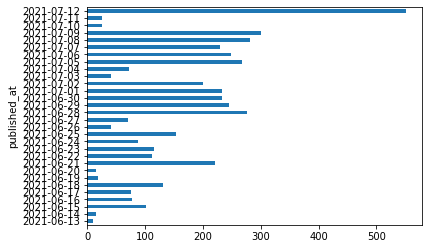

In [43]:
# постройте график этих вакансий

df = df.set_index('published_at')
df = df.reset_index()
df.groupby('published_at')['id'].count().plot(kind='barh');

In [48]:
#  определите день недели, в который больше всего публикуют вакансий

df['weekday'] = df.published_at.apply(lambda x: x.weekday())
df.groupby('weekday')['id'].count()

weekday
0    1331
1     710
2     657
3     678
4     785
5     126
6     196
Name: id, dtype: int64

In [51]:
# вакансии аналитик 
t1 = df.name.str.contains('Аналитик') 
an_df = df[t1]
an_df

,published_at,id,name,description,skills,weekday
7,2021-07-07,46066025,Аналитик,<p><strong>Задачи:</strong></p> <ul> <li>Собир...,[[]],2
71,2021-07-10,44787454,Системный Аналитик,<p>В продуктовую команду ДИТ Блока Корпоративн...,"[[{'name': 'UML'}, {'name': 'BPMN'}, {'name': ...",5
84,2021-06-21,45606175,Аналитик данных,<p>В дирекцию по экосистеме юридических ищем а...,[[]],0
87,2021-07-01,42292116,Руководитель направления BI / Разработчик BI /...,<p>Наша команда занимаемся развитием и сопрово...,[[]],3
95,2021-06-17,45176584,Junior Аналитик,<p>О нас:</p> <p>Мы занимаемся развитием техно...,[[]],3
...,...,...,...,...,...,...
4385,2021-07-07,46053264,"Аналитик (проект ""Единая фронтальная система"")",<p><strong>Проект:</strong></p> <p>Участие в р...,"[[{'name': 'Atlassian Jira'}, {'name': 'Atlass...",2
4405,2021-06-29,45807651,Системный и Бизнес Аналитик,<p><strong>Мы — команда Департамента корпорати...,[[]],1
4421,2021-06-15,45447604,Аналитик данных,<p><b>Обязанности:</b></p><p> </p><ul><li>поис...,[[]],1
4430,2021-07-12,45610242,Аналитик,<p></p><p><b></b></p><p><b>SberData</b> – депа...,[[]],0


In [54]:
# группмровка по вакансиям
an_df.groupby('name')['id'].count()

name
Analyst (Аналитик, команда Клиентской аналитики, Корпоративный блок)     2
Analyst кластера 'Аналитика и AI'                                        2
ESG Аналитик                                                             3
Junior Аналитик                                                          3
List manager - Аналитик данных                                           2
Senior Analyst кластера 'Аналитика и AI'                                 2
Team lead с обязанностями Аналитика/Разработчика SAS CIS/DIS             2
UX Аналитик                                                              2
Аналитик                                                                19
Аналитик ( Голос клиента )                                               2
Аналитик (Access, Excel, SQL)                                            1
Аналитик (ELK team)                                                      2
Аналитик (SAS Кампании продаж) Junior                                    1
Аналитик (SQL) в Отд

In [53]:
# вакансии аналитик, который использует питон - вакансий нет

t2 = an_df.name.str.contains('python|sql') 
a_df = an_df[t2]
a_df

,published_at,id,name,description,skills,weekday
